In [70]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [71]:
conn = sqlite3.connect('../HomelessData.db')
c = conn.cursor()

In [72]:
# Loading data
df = pd.read_sql("SELECT * FROM CocData WHERE year < 2020", con = conn)

df.head(20)

,Coc,Total,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,Total:1,Unsheltered,Sheltered
0,AK-500,1033,799,234,0,171,601,71,2019,AK-500 2019,1111,97,1014
1,AK-501,845,575,270,0,67,386,0,2019,AK-501 2019,796,176,620
2,AL-500,827,516,277,34,106,1740,0,2019,AL-500 2019,981,326,655
3,AL-501,394,261,133,0,31,240,0,2019,AL-501 2019,505,202,303
4,AL-502,189,106,83,0,0,42,8,2019,AL-502 2019,390,201,189
5,AL-503,551,517,34,0,32,298,0,2019,AL-503 2019,464,87,377
6,AL-504,356,226,130,0,39,465,0,2019,AL-504 2019,330,57,273
7,AL-505,115,98,17,0,0,10,0,2019,AL-505 2019,224,149,75
8,AL-506,99,91,8,0,0,294,0,2019,AL-506 2019,44,0,44
9,AL-507,170,122,48,0,0,77,0,2019,AL-507 2019,323,169,154


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Coc                  2336 non-null   object
 1   Total                2336 non-null   int64 
 2   Emergency            2336 non-null   int64 
 3   Transitional         2336 non-null   int64 
 4   SafeHaven            2336 non-null   int64 
 5   RapidRehousing       2336 non-null   int64 
 6   PermanentSupportive  2336 non-null   int64 
 7   PermanentOther       2336 non-null   int64 
 8   Year                 2336 non-null   object
 9   CocYear              2336 non-null   object
 10  Total:1              2336 non-null   int64 
 11  Unsheltered          2336 non-null   int64 
 12  Sheltered            2336 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 237.4+ KB


In [74]:
df2 = df.drop(['Coc', 'CocYear', 'Sheltered', 'Year'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Total                2336 non-null   int64
 1   Emergency            2336 non-null   int64
 2   Transitional         2336 non-null   int64
 3   SafeHaven            2336 non-null   int64
 4   RapidRehousing       2336 non-null   int64
 5   PermanentSupportive  2336 non-null   int64
 6   PermanentOther       2336 non-null   int64
 7   Total:1              2336 non-null   int64
 8   Unsheltered          2336 non-null   int64
dtypes: int64(9)
memory usage: 164.4 KB


In [75]:
df2['Unsheltered_perc_tot'] = (df2['Unsheltered'] / df2['Total:1']) *100

In [76]:
df2['TotalBeds_perc_tot'] = (df2['Total'] / df2['Total:1']) *100

In [77]:
df2['Emergency_perc_tot'] = (df2['Emergency'] / df2['Total:1']) *100

In [78]:
df2['Transitional_perc_tot'] = (df2['Transitional'] / df2['Total:1']) *100

In [79]:
df2['SafeHaven_perc_tot'] = (df2['SafeHaven'] / df2['Total:1']) *100

In [80]:
df2['PermanentSupportive_perc_tot'] = (df2['PermanentSupportive'] / df2['Total:1']) *100

In [81]:
df2['PermanentOther_perc_tot'] = (df2['PermanentOther'] / df2['Total:1']) *100

In [82]:
df2['RapidRehousing_perc_tot'] = (df2['RapidRehousing'] / df2['Total:1']) *100

In [83]:
df2.head()

,Total,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Total:1,Unsheltered,Unsheltered_perc_tot,TotalBeds_perc_tot,Emergency_perc_tot,Transitional_perc_tot,SafeHaven_perc_tot,PermanentSupportive_perc_tot,PermanentOther_perc_tot,RapidRehousing_perc_tot
0,1033,799,234,0,171,601,71,1111,97,8.730873,92.979298,71.917192,21.062106,0.000000,54.095410,6.390639,15.391539
1,845,575,270,0,67,386,0,796,176,22.110553,106.155779,72.236181,33.919598,0.000000,48.492462,0.000000,8.417085
2,827,516,277,34,106,1740,0,981,326,33.231397,84.301733,52.599388,28.236493,3.465851,177.370031,0.000000,10.805301
3,394,261,133,0,31,240,0,505,202,40.000000,78.019802,51.683168,26.336634,0.000000,47.524752,0.000000,6.138614
4,189,106,83,0,0,42,8,390,201,51.538462,48.461538,27.179487,21.282051,0.000000,10.769231,2.051282,0.000000


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Total                         2336 non-null   int64  
 1   Emergency                     2336 non-null   int64  
 2   Transitional                  2336 non-null   int64  
 3   SafeHaven                     2336 non-null   int64  
 4   RapidRehousing                2336 non-null   int64  
 5   PermanentSupportive           2336 non-null   int64  
 6   PermanentOther                2336 non-null   int64  
 7   Total:1                       2336 non-null   int64  
 8   Unsheltered                   2336 non-null   int64  
 9   Unsheltered_perc_tot          2336 non-null   float64
 10  TotalBeds_perc_tot            2336 non-null   float64
 11  Emergency_perc_tot            2336 non-null   float64
 12  Transitional_perc_tot         2336 non-null   float64
 13  Saf

In [85]:
df3 = df2.drop(['Emergency', 'Transitional', 'SafeHaven', 'RapidRehousing', 'PermanentSupportive', 'PermanentOther', 'Unsheltered', 'Total', 'Total:1'], axis=1)

In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unsheltered_perc_tot          2336 non-null   float64
 1   TotalBeds_perc_tot            2336 non-null   float64
 2   Emergency_perc_tot            2336 non-null   float64
 3   Transitional_perc_tot         2336 non-null   float64
 4   SafeHaven_perc_tot            2336 non-null   float64
 5   PermanentSupportive_perc_tot  2336 non-null   float64
 6   PermanentOther_perc_tot       2336 non-null   float64
 7   RapidRehousing_perc_tot       2336 non-null   float64
dtypes: float64(8)
memory usage: 146.1 KB


In [87]:
# Define the features set.
X = df3.copy()
X = X.drop("Unsheltered_perc_tot", axis=1)
X.head()

,TotalBeds_perc_tot,Emergency_perc_tot,Transitional_perc_tot,SafeHaven_perc_tot,PermanentSupportive_perc_tot,PermanentOther_perc_tot,RapidRehousing_perc_tot
0,92.979298,71.917192,21.062106,0.000000,54.095410,6.390639,15.391539
1,106.155779,72.236181,33.919598,0.000000,48.492462,0.000000,8.417085
2,84.301733,52.599388,28.236493,3.465851,177.370031,0.000000,10.805301
3,78.019802,51.683168,26.336634,0.000000,47.524752,0.000000,6.138614
4,48.461538,27.179487,21.282051,0.000000,10.769231,2.051282,0.000000


In [88]:
# Define the target set.
y = df3["Unsheltered_perc_tot"].ravel()
y[:5]

array([ 8.73087309, 22.11055276, 33.23139653, 40.        , 51.53846154])

In [89]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [90]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [91]:
reg_model = regr.fit(X, y)

In [92]:
importances = reg_model.feature_importances_
importances

array([9.23422410e-01, 3.91236446e-02, 4.24955130e-03, 4.17659831e-03,
       2.87525192e-02, 0.00000000e+00, 2.75276383e-04])

In [93]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.9234224101984242, 'TotalBeds_perc_tot'),
 (0.03912364458868498, 'Emergency_perc_tot'),
 (0.028752519220807318, 'PermanentSupportive_perc_tot'),
 (0.00424955129586764, 'Transitional_perc_tot'),
 (0.004176598312966011, 'SafeHaven_perc_tot'),
 (0.00027527638324965616, 'RapidRehousing_perc_tot'),
 (0.0, 'PermanentOther_perc_tot')]

In [94]:
%matplotlib inline
from matplotlib import pyplot as plt

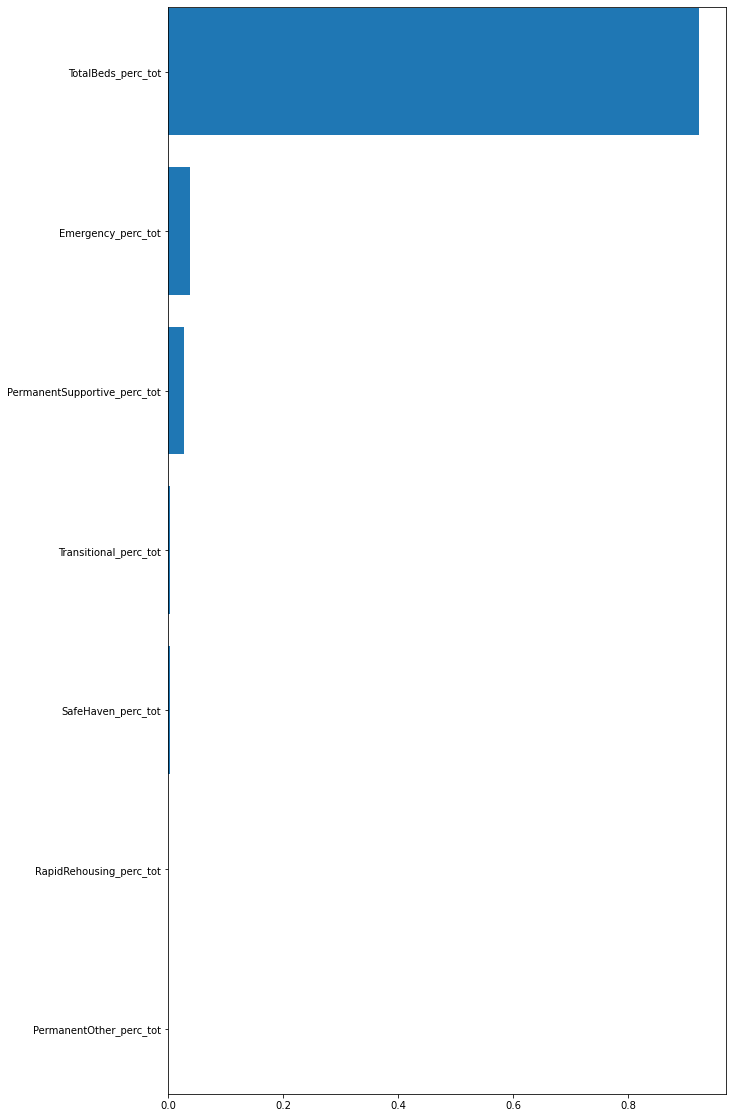

In [95]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [96]:
estimator = reg_model.estimators_[5]

[Text(0.5, 0.875, 'X[0] <= 55.566\nsquared_error = 528.297\nsamples = 1477\nvalue = 25.267'),
 Text(0.25, 0.625, 'X[0] <= 39.237\nsquared_error = 565.19\nsamples = 312\nvalue = 56.744'),
 Text(0.125, 0.375, 'X[0] <= 17.704\nsquared_error = 416.342\nsamples = 154\nvalue = 68.227'),
 Text(0.0625, 0.125, 'squared_error = 194.952\nsamples = 30\nvalue = 86.55'),
 Text(0.1875, 0.125, 'squared_error = 374.501\nsamples = 124\nvalue = 64.165'),
 Text(0.375, 0.375, 'X[1] <= 35.253\nsquared_error = 440.861\nsamples = 158\nvalue = 44.829'),
 Text(0.3125, 0.125, 'squared_error = 377.357\nsamples = 121\nvalue = 49.183'),
 Text(0.4375, 0.125, 'squared_error = 370.996\nsamples = 37\nvalue = 29.913'),
 Text(0.75, 0.625, 'X[0] <= 78.03\nsquared_error = 188.868\nsamples = 1165\nvalue = 16.976'),
 Text(0.625, 0.375, 'X[4] <= 82.629\nsquared_error = 263.309\nsamples = 292\nvalue = 28.017'),
 Text(0.5625, 0.125, 'squared_error = 271.82\nsamples = 188\nvalue = 31.853'),
 Text(0.6875, 0.125, 'squared_error = 

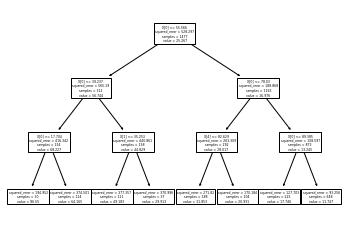

In [97]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])

In [98]:
df3.to_excel('Percent_Total_Homeless_vf.xlsx', index=False)